<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/06_Graph_Attention_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Attention Networks (ICLR)

##Preliminaries

- 선행지식 
    - CNN
        - 한계
            1. 많은 layer가 필요함,
            2. 자연어의 길이가 너무 길어지면 관계를 알 수 없게됨.
        
    - RNN 
        - 한계
            1. 구조 상 순차적으로 학습이 진행되기 때문에 병렬연산이 되지 않음.
            2. 시간복잡도가 올라가는 단점이 있음, 
            3. Vanishing gradient problem(기울기 소멸 문제) : 신경망의 활성함수의 도함수값이 계속 곱해지다보면 가중치에 따른 결과값의 기울기가 0이 되어 버려서, 경사 하강법을 이용할 수 없게 되는 문제
            4. Long Term dependency(장기 의존성) : 

    - Attention 
        1. 계산 복잡도를 줄이고 
        2. 병렬화를 통해 길이가 길어지면서 발생하는 문제를 해결할 수 있음.

    - About Graph
        1. Graph  
        2. Node  
        3. Edge  
        4. Adjacency matrix  

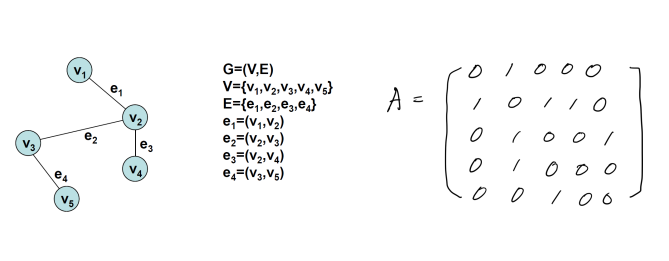

    - GNN Operations
        1. aggregate 
            - 타겟 노드의 이웃 노드들의 k-1시점의 hidden state를 합침

        2. combine 
            - 타겟 노드의 aggregate값과 타켓 노드의 k-1시점의 정보를 활용하여 k시점의 정보 업데이트 
            


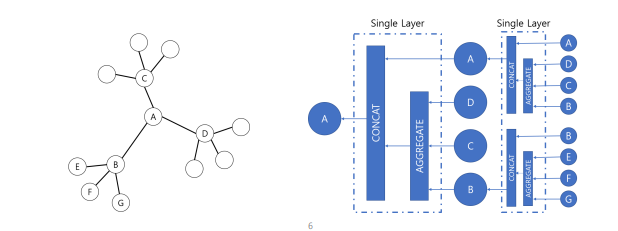

  - GCN Graph Convolution Network
    - 모든 노드의 weight가 동일하게 설정되어 있어서 weight sharing이 가능 
    
- Transductive Learning
    - 학습/ 검증/ 평가 셋이 한 그래프에 존재
    - 노드, 엣지 prediction task에 적용 가능
    - Semi-supervised learning 방식과 유사
    - 사전에 훈련 데이터셋과 테스트 데이터셋을 모두 관찰
    - 테스트 데이터의 레이블은 없지만 그 안에서 유의미한 패턴 추출이 가능
    - 모델을 구축하지 않아서 새로운 데이터가 입력으로 들어왔을 때 알고리즘을 처음부터 재시작할 필요성이 존재하여 계산 효율 낮음

- Inductive Learning
    - 학습/검증/평가 셋이 다른 그래프에 존재 
    - unseen input에 대해서도 일반화
    - 노드, 엣지, 그래프 prediction task에 적용
    - Supervised learning 방식과 유사
    - 이미 레이블링 된 훈련 데이터셋을 활용하여 머신 러닝 모델 구축
    - 이렇게 구축된 모델은 훈련 데이터셋에서 본 적이 없는(unseen) 테스트 데이터셋의 레이블을 예측하는데 사용
    - 훈련 데이터셋만 활용하여 훈련된 모델을 구축한 후 테스트 데이터셋의 레이블을 예측
    - 모델을 구축하기 때문에 새로운 데이터가 입력으로 들어왔을 때 알고리즘을 처음부터 재시작할 필요성이 없어서 계산 효율 높음




## Model

### Model Architecture

- Graph Attention network은 기존의 graph neural network(GNN)과 유사하게 노드 embedding layer와 dense layer로 구성됨.

- 입력 그래프에 대해 노드 embedding layer에서는 각 노드에 대한 embedding을 생성함.

- Readout은 그래프 단위의 출력을 만드는 경우에만 존재하는 계층으로써 전체 노드에 대한 노드 embedding을 모두 더하거나 평균을 내는 방식으로 그래프 전체의 embedding을 생성함.

- 마지막으로, dense layer에서는 주어진 노드 또는 그래프 embedding에 대해 출력이 계산됨.

- Dense layer의 출력으로는 노드 또는 그래프의 embedding 뿐만 아니라, 노드 또는 그래프에 대한 class label 및 target property 등이 될 수도 있음.






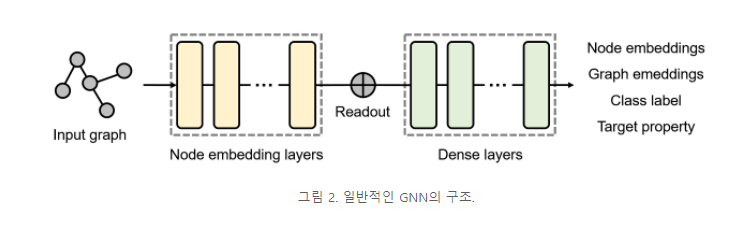

- 가장 대표적인 GNN인 graph convolutional network (GCN)에서는 노드 embedding layer가 graph convolution이라는 연산으로 정의되었지만, 

- GAT에서는 self-attention으로 노드 embedding layer가 정의됨.

- GAT는 어떤한 노드의 embedding을 생성할 때 인접한 노드들에 대한 중요도를 계산하여 이를 기반으로 새로운 embedding을 만듦

-

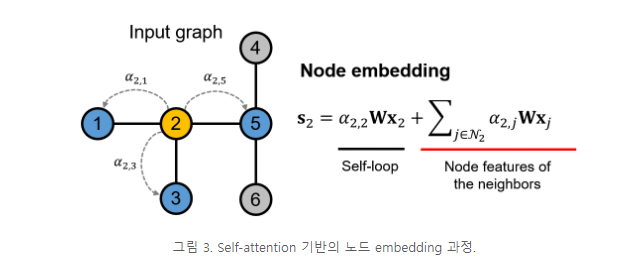

- Graph Attention Layer 
     - Graph attention layer는 self-attention을 기반으로 노드 embedding을 생성하는 계층이다. 
     - GAT에서 k번째 graph attention layer의 출력 h(k)i은 다음과 같이 정의된다.

##Experiments

Datasets : baseline 모델들과 비교하기 위해, 잘 알려진 4가지 dataset에서 실험 진행

- Transductive learning의 performance 측정을 위해 Cora, Citeseer, Pubmed 세 가지의 citation network dataset을 이용함.
- Inductive learning의 performance 측정을 위해 protein-protein interaction(PPI) datassets에서 실험 수행


Results : GCN과의 비교를 통해, 같은 neighborthood 내의 node 들에 대해 다른 weight를 부여하는 방법이 효과적임.

## Conclusion

GAT는 graph data structure에 적용될 수 있는 convolution을 제안한 것으로 다음과 같은 특징을 갖는다.

- 장점 (효율적인 연산, 노드별 중요도 부여, Inductive learning 가능)
    - Self attention layer를 통해 node들마다 병렬화가 가능하며, 이웃 노드별로 다른 중요도를 부과할 수 있다.

- 단점
    - 각기 다른 이웃 Node에 대하여 attention score를 구함으로 계산 효율성을 떨어진다. 
(PPNP논문 비교 결과)

In [ ]:
참고 : https://www.youtube.com/watch?v=FPIUdRGvu80